# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: The outcome is whether or not a customer will choose to  convert into paying customers from the free plan. 

#### 2. What are the predictors/covariates? 

Answer: Age, Gender, Location, Profession, Days since last log-in, Active User (yesno)

#### 3. What timeframe is this data relevent for?

Answer: This data is based on observations from January - April of 2015, but the patterns should be generalizeable for some time period beyond that until fundamental shifts in user base mix render the data stale. 

#### 4. What is the hypothesis?

Answer: Active users will be more likely to conver into paying customers. 

## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
admit_data = pd.read_csv('/Users/Neal/Desktop/GA/NealPatel_GA_DAT_NYC_9_27/Project 1/admissions.csv')

Answer: 

Variable | Description | Type of Variable
---| ---| ---
Admit | 0 = rejected 1 = admitted | categorical
GRE Score | Score on Standardized GRE Test | continuous 
GPA | Grade Point Average of the Student | continuous 
Prestige | Rank from 1 to 4 the prestige of the student's undergraduate school | categorical (ordinal)

We would like to explore the association between X and Y 

#### 2. What is the outcome?

Answer: Outcome is whether or not the student was admitted

#### 3. What are the predictors/covariates? 

Answer: GRE Score, GPA and Rank

#### 4. What timeframe is this data relevent for?

The dataset itself does not provide an indication of the timing of the observations. Additional research on the UCLA website did not provide additional detail on the timing. 

#### 4. What is the hypothesis?

Answer: Students from schools with a higher prestige are more likely to be admitted regardless of GPA or GRE scores. 

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: The goals of the exploratory analysis are to become familiar with the nuances of the data set and determine the best approach to deal with any confounding factors. Things such as the distribution of the data and outliers may have an adverse effect on the conclusions reached by a model if they are not properly accounted for. 

#### 2a. What are the assumptions of the distribution of data? 

Answer: The data is assumed to be normally distributed. 

#### 2b. How will you determine the distribution of your data? 

Answer: See below.

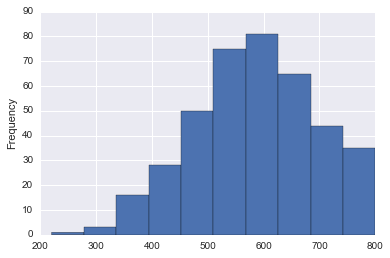

In [31]:
admit_data['gre'].plot(kind='hist')

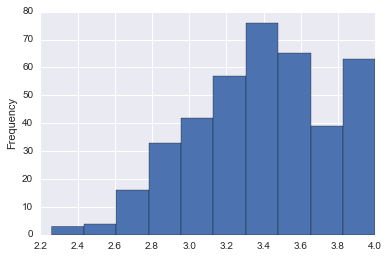

In [35]:
admit_data['gpa'].plot(kind='hist')

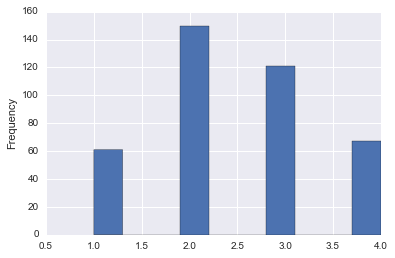

In [37]:
admit_data['prestige'].plot(kind='hist')

#### 3a. How might outliers impact your analysis? 

Answer: Outliers may skew the results of a model and may confound the conclusions. 

#### 3b. How will you test for outliers? 

Answer: See below. Fortunately, categorical variables cannot be outliers by definition, however continuous variables can have infinite possible values. Upon further analysis, we can see that there is an upper limit on the values of GPA and GRE scores, which is in line with our expectations of that data. 

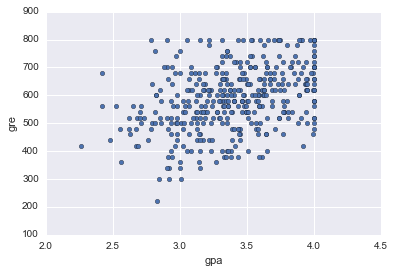

In [46]:
admit_data.plot(kind='scatter', x='gpa', y='gre')

#### 4a. What is colinearity? 

Answer: Colinearity is when 2 or more predictors have a strong correlation to one another and can predict one another to a high degree of accuracy. 

#### 4b. How will you test for colinearity? 

Answer: The results below indicate that there will be no issues with colinearity for this dataset. This can be observed by the summary of coefficient values. Aside from the diagonal (where predictors are compared against themself), the coefficient values are low. 

In [38]:
admit_data.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: See below.
1) First we check the distribution of the data and determine the presence fo outliers (above). 
2) Next we establish that no collinearity exists within the dataset. 
3) Furthermoe, we look at the skewness and kurtosis of the data to determine the shape of the data. 
4) In an ideal world, we would be able to ask the source of the data questions around the methodology for "prestige" to ensure no additional confounding factors are present in the data. 
5) Once all the details are acquired, we would go through the process of model selection and testing the parameters of the model to identify the best approach for running the prediction. This would be done using the k-fold method to ensure we avoid overfitting the data. 


In [40]:
admit_data.skew()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64

In [42]:
admit_data.kurt()

admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

1) I would potentially consider the use of an ordered logit model to appropriately measure the impact of prestige on the outcome. This enables us to preserve the information that is provided in the prestige rankings.

2) GPA's above a certain value 'x' do not provide substantial incremental value in gaining admission into graduate school.

3) This alternative model assumes that GPA has any value at all in predicting the likelihood of admission. Furthermore, admissions are determined by the undergraduate institution which may or may not have standardized methodology in creating those values. Finally, the applications are reviewed by humans, which add an additional layer of variability in the outcome that is not captured by the dataset. 